In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from matplotlib.ticker import MaxNLocator



In [2]:
df = pd.read_csv("../dataset/cleaned_df.csv")
df.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account,County
0,25,49,91107,4,1.6,1,0,0,0,Los Angeles
1,45,34,90089,3,1.5,1,0,0,0,Los Angeles
2,39,11,94720,1,1.0,1,0,0,0,Alameda
3,35,100,94112,1,2.7,2,0,0,0,San Francisco
4,35,45,91330,4,1.0,2,0,0,0,Los Angeles


In [3]:
df_temp = df[df["Personal Loan"] == 1]
df_temp.groupby("County").count()["Personal Loan"].sort_values(ascending=False)

County
Los Angeles        110
Santa Clara         73
San Diego           57
Alameda             44
Orange              29
San Francisco       19
Monterey            15
Sacramento          14
Contra Costa        12
Santa Barbara       11
Ventura             10
San Mateo           10
Santa Cruz           8
Yolo                 8
Kern                 7
Riverside            6
Marin                6
Sonoma               6
San Luis Obispo      5
Shasta               3
Solano               3
San Bernardino       3
Placer               2
Humboldt             2
Fresno               2
Butte                1
Mendocino            1
San Joaquin          1
Stanislaus           1
El Dorado            1
Name: Personal Loan, dtype: int64

In [4]:
loan_counts = df_temp.groupby("County")["Personal Loan"].count()
total_counts = df_temp.groupby("County").size().sum()

loan_percentage = (loan_counts / total_counts) * 100
loan_percentage = loan_percentage.round(2)

loan_percentage_sorted = loan_percentage.sort_values(ascending=False)
loan_counts_sorted = loan_counts.sort_values(ascending=False)


In [5]:
select_top = 6

top_counties_share = loan_percentage_sorted.head(select_top)
other_counties_share = loan_percentage_sorted[select_top:].sum()

top_counties_count = loan_counts_sorted.head(select_top)
other_counties_count = loan_counts_sorted[select_top:].sum()

final_data = pd.DataFrame({
    'by_share': top_counties_share,
    'by_count': top_counties_count

})

others_data = pd.DataFrame({
        "by_share" : other_counties_share,
        "by_count" : other_counties_count
}, index=["Others"])

final_data = pd.concat([final_data, others_data], axis=0)
final_data

,by_share,by_count
Los Angeles,23.40,110
Santa Clara,15.53,73
San Diego,12.13,57
Alameda,9.36,44
Orange,6.17,29
San Francisco,4.04,19
Others,29.37,138


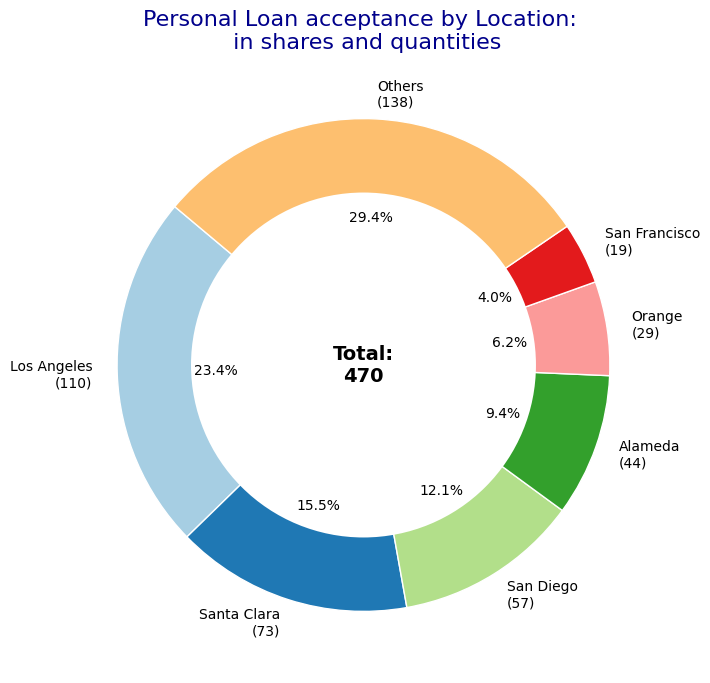

In [6]:
labels = [f'{idx}\n({count})' for idx, share, count in zip(final_data.index, final_data['by_share'], final_data['by_count'])]

plt.figure(figsize=(8, 8))

wedges, texts, autotexts = plt.pie(
    final_data['by_share'], 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors, 
    wedgeprops={'edgecolor': 'white'}
)

center_circle = plt.Circle((0, 0), 0.7, fc='white')  # Adjust the radius (0.65) for a larger or smaller hole
plt.gca().add_artist(center_circle)

total_count = sum(final_data["by_count"])
plt.text(0, 0, f'Total:\n{total_count}', ha='center', va='center', fontsize=14, fontweight='bold')
plt.title('Personal Loan acceptance by Location: \n in shares and quantities', fontsize=16, color='darkblue')
plt.show()


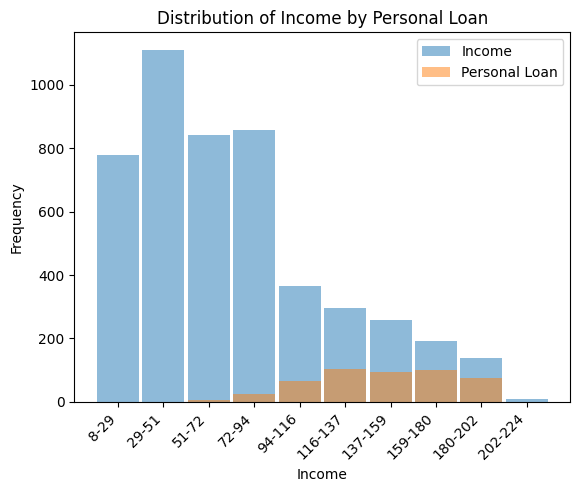

In [7]:

bins = 10
bar_width = 20

# Compute the histogram for "Age" to define the bin edges
age_hist, age_bins = np.histogram(df["Income"], bins=bins)
# Compute the histogram for "Personal Loan" using the same bins as "Age"
loan_hist, _ = np.histogram(df["Income"][df["Personal Loan"] == 1], bins=age_bins)
# Calculate the centers of the bars for "Age"
age_centers = age_bins[:-1] + np.diff(age_bins) / 2
plt.bar(age_centers, age_hist, width=bar_width, alpha=0.5, label="Income")
# Plot histogram for "Personal Loan" (overlapping with "Age" bars)
plt.bar(age_centers, loan_hist, width=bar_width, alpha=0.5, label="Personal Loan")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Distribution of Income by Personal Loan")
plt.xticks(age_centers, 
        [f"{int(age_bins[i])}-{int(age_bins[i+1])}" for i in range(len(age_bins)-1)], 
        rotation=45, ha='right')
plt.legend()
plt.show()


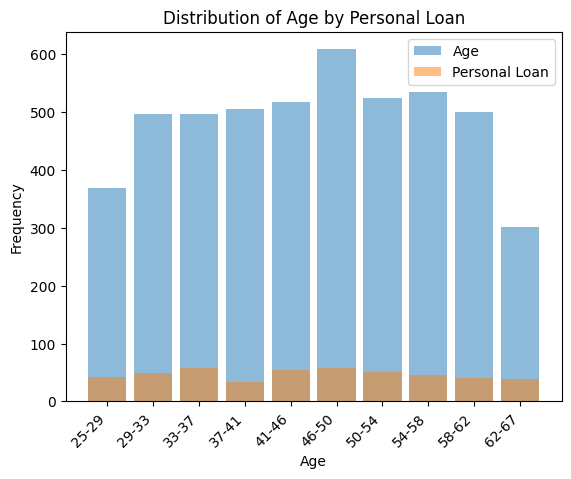

In [8]:

bins = 10
bar_width = 3.5

# Compute the histogram for "Age" to define the bin edges
age_hist, age_bins = np.histogram(df["Age"], bins=bins)
# Compute the histogram for "Personal Loan" using the same bins as "Age"
loan_hist, _ = np.histogram(df["Age"][df["Personal Loan"] == 1], bins=age_bins)
# Calculate the centers of the bars for "Age"
age_centers = age_bins[:-1] + np.diff(age_bins) / 2
plt.bar(age_centers, age_hist, width=bar_width, alpha=0.5, label="Age")
# Plot histogram for "Personal Loan" (overlapping with "Age" bars)
plt.bar(age_centers, loan_hist, width=bar_width, alpha=0.5, label="Personal Loan")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age by Personal Loan")
plt.xticks(age_centers, 
        [f"{int(age_bins[i])}-{int(age_bins[i+1])}" for i in range(len(age_bins)-1)], 
        rotation=45, ha='right')
plt.legend()
plt.show()


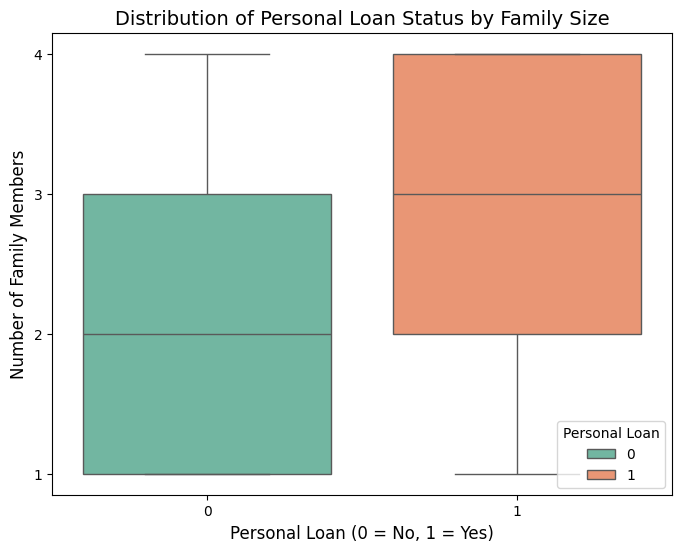

In [9]:
plt.figure(figsize=(8, 6))

sn.boxplot(x='Personal Loan', y='Family', data=df, hue='Personal Loan', palette='Set2')

ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.title('Distribution of Personal Loan Status by Family Size', fontsize=14)
plt.xlabel('Personal Loan (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Number of Family Members', fontsize=12)
plt.legend(title="Personal Loan", loc="lower right")
plt.show()


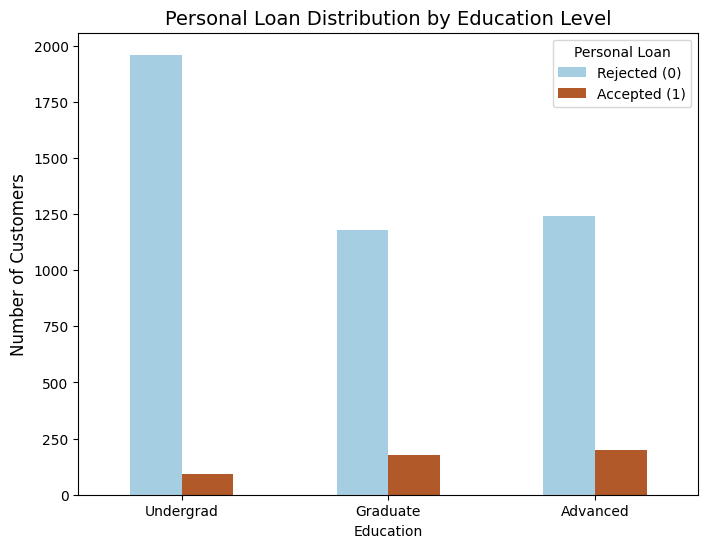

In [10]:
edu_loan_counts_abs = df.groupby("Education")["Personal Loan"].value_counts().unstack()
edu_labels = ["Undergrad", "Graduate", "Advanced"]

edu_loan_counts_abs.plot(kind="bar", figsize=(8, 6), colormap="Paired")

plt.title("Personal Loan Distribution by Education Level", fontsize=14)
plt.ylabel("Number of Customers", fontsize=12)
plt.legend(title="Personal Loan", labels=["Rejected (0)", "Accepted (1)"])

plt.xticks(ticks=range(len(edu_labels)), labels=edu_labels, rotation=0)
plt.show()


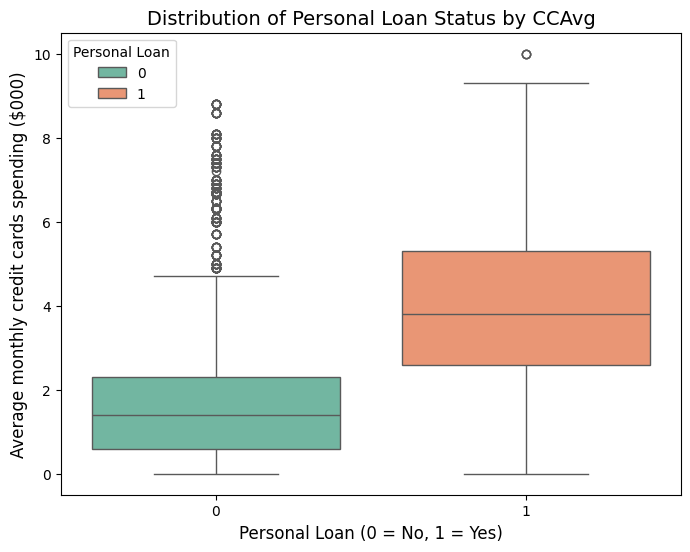

In [11]:
plt.figure(figsize=(8, 6))
sn.boxplot(x='Personal Loan', y='CCAvg', data=df, hue='Personal Loan', palette='Set2')

plt.title('Distribution of Personal Loan Status by CCAvg', fontsize=14)
plt.xlabel('Personal Loan (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Average monthly credit cards spending ($000)', fontsize=12)
plt.show()

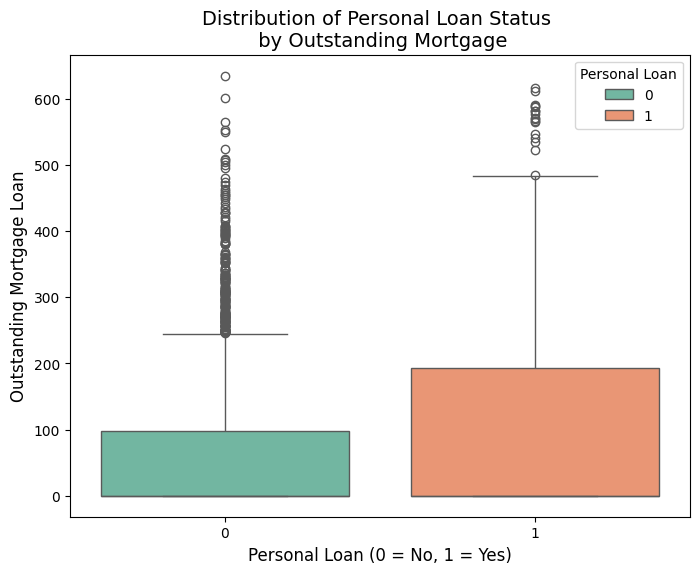

In [12]:
plt.figure(figsize=(8, 6))
sn.boxplot(x='Personal Loan', y='Mortgage', data=df, hue='Personal Loan', palette='Set2')

plt.title('Distribution of Personal Loan Status \n by Outstanding Mortgage', fontsize=14)
plt.xlabel('Personal Loan (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Outstanding Mortgage Loan', fontsize=12)
plt.show()

In [13]:
df.groupby("CD Account")["Personal Loan"].value_counts().unstack()

Personal Loan,0,1
CD Account,,
0,4219,331
1,161,139


In [14]:
table = df.groupby("CD Account")["Personal Loan"].value_counts().unstack().fillna(0)

table_percentage = table.div(table.sum(axis=1), axis=0) * 100
final_table = table.astype(int).astype(str) + " (" + table_percentage.round(1).astype(str) + "%)"
final_table

Personal Loan,0,1
CD Account,,
0,4219 (92.7%),331 (7.3%)
1,161 (53.7%),139 (46.3%)


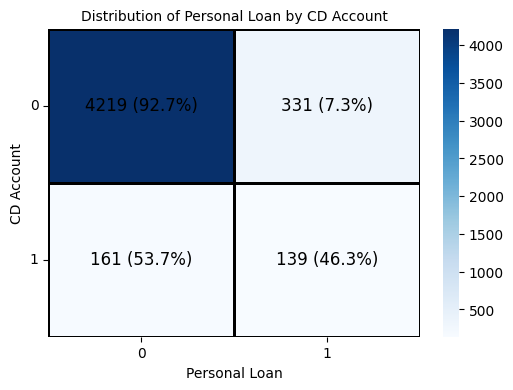

In [15]:
plt.figure(figsize=(6, 4))

numeric_table = table
ax = sn.heatmap(numeric_table, annot=False, cmap="Blues", linewidths=1, linecolor="black")

for i in range(final_table.shape[0]):
    for j in range(final_table.shape[1]):
        ax.text(j + 0.5, i + 0.5, final_table.iloc[i, j], ha='center', va='center', fontsize=12, color="black")

plt.title("Distribution of Personal Loan by CD Account", fontsize=10)
plt.xlabel("Personal Loan")
plt.ylabel("CD Account")
plt.xticks(np.arange(len(final_table.columns)) + 0.5, final_table.columns)
plt.yticks(np.arange(len(final_table.index)) + 0.5, final_table.index, rotation=0)

plt.show()
